# Training models JC 5G

# Packages and dataset imports

In [1]:
# General import and load data
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Text splitting
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split 

# NLP
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [2]:
# Import clean dataset 
df_5g_clean = pd.read_csv('dataset-5g-clean.csv')
# Show clean dataset 
df_5g_clean = df_5g_clean.set_index('id')
df_5g_clean.head()

,Datetime,tweet,clean,Tweet_len,hashtags,n_htags,word_count,ev_emoji,stopwords,stem,emotion,polarity
id,,,,,,,,,,,,
"1,25897E+18",2020-05-09 3:43:57,RT @skitvomfeinsten: +++++++ GOD AlWAYS WIN ++...,rt skitvomfeinsten god always win ...,140,"{'JE…', '5G', 'WWG1WGA', 'Tower', 'WORLDWIDE',...",6,20,0,rt skitvomfeinsten god always win birds discon...,rt skitvomfeinsten god alway win bird disconne...,0.800000,1
1258470733879148547,2020-05-07 18:56:18,RT @HalladayIn: @outofcontroljb @kaitlancollin...,rt halladayin outofcontroljb kaitlancollin...,140,set(),0,21,0,rt halladayin outofcontroljb kaitlancollins co...,rt halladayin outofcontroljb kaitlancollin cov...,-0.090909,-1
1258470843597889537,2020-05-07 18:56:45,RT @matthaig1: Hi conspiracy theorists! A few ...,rt matthaig1 hi conspiracy theorists a few ...,140,set(),0,27,0,rt matthaig1 hi conspiracy theorists q 5g rela...,rt matthaig 1 hi conspiraci theorist q 5g rela...,-0.100000,-1
1258470857325686785,2020-05-07 18:56:48,RT @panos941: People beginning to lose it 😬&gt...,rt panos941 people beginning to lose it gt...,143,set(),0,24,0,rt panos941 people beginning lose gt almost 80...,rt pano 941 peopl begin lose gt almost 80 mobi...,-0.226852,-1
1258470865286635522,2020-05-07 18:56:50,RT @ZaidZamanHamid: This is one of the most im...,rt zaidzamanhamid this is one of the most im...,139,{'Covid_19'},1,22,0,rt zaidzamanhamid important reasons launched c...,rt zaidzamanhamid thi one import reason whi la...,0.450000,1


In [3]:
# Import clean dataset 
df_5g_clean = pd.read_csv('Equipo/CHALLENGE_2/datasetClean/dataset_5g_clean.csv')
# Show clean dataset 
df_5g_clean = df_5g_clean.set_index('id')
df_5g_clean.head()

,Datetime,tweet,clean,Tweet_len,hashtags,n_htags,word_count,ev_emoji,stopwords,stem,emotion,polarity
id,,,,,,,,,,,,
"1,25897E+18",2020-05-09 3:43:57,RT @skitvomfeinsten: +++++++ GOD AlWAYS WIN ++...,rt skitvomfeinsten god always win ...,140,"{'JE…', '5G', 'WWG1WGA', 'Tower', 'WORLDWIDE',...",6,20,0,rt skitvomfeinsten god always win birds discon...,rt skitvomfeinsten god alway win bird disconne...,0.800000,1
1258470733879148547,2020-05-07 18:56:18,RT @HalladayIn: @outofcontroljb @kaitlancollin...,rt halladayin outofcontroljb kaitlancollin...,140,set(),0,21,0,rt halladayin outofcontroljb kaitlancollins co...,rt halladayin outofcontroljb kaitlancollin cov...,-0.090909,-1
1258470843597889537,2020-05-07 18:56:45,RT @matthaig1: Hi conspiracy theorists! A few ...,rt matthaig1 hi conspiracy theorists a few ...,140,set(),0,27,0,rt matthaig1 hi conspiracy theorists q 5g rela...,rt matthaig 1 hi conspiraci theorist q 5g rela...,-0.100000,-1
1258470857325686785,2020-05-07 18:56:48,RT @panos941: People beginning to lose it 😬&gt...,rt panos941 people beginning to lose it gt...,143,set(),0,24,0,rt panos941 people beginning lose gt almost 80...,rt pano 941 peopl begin lose gt almost 80 mobi...,-0.226852,-1
1258470865286635522,2020-05-07 18:56:50,RT @ZaidZamanHamid: This is one of the most im...,rt zaidzamanhamid this is one of the most im...,139,{'Covid_19'},1,22,0,rt zaidzamanhamid important reasons launched c...,rt zaidzamanhamid thi one import reason whi la...,0.450000,1


In [4]:
# Check previous NaN in text
df_5g_clean[df_5g_clean.stopwords.isna()]


,Datetime,tweet,clean,Tweet_len,hashtags,n_htags,word_count,ev_emoji,stopwords,stem,emotion,polarity
id,,,,,,,,,,,,


## Transformations

In [5]:
# Delete first column and select proper columns 
df_5g_clean.columns = ['date','tweet', 'preproc_text','length','hashtags','n_htags','word_count','ev_emoji','clean_text','stem','emotion','polarity']
df_5g_clean.drop(['date','length','hashtags','n_htags',], axis=1, inplace=True)
df_5g_clean.head()

,tweet,preproc_text,word_count,ev_emoji,clean_text,stem,emotion,polarity
id,,,,,,,,
"1,25897E+18",RT @skitvomfeinsten: +++++++ GOD AlWAYS WIN ++...,rt skitvomfeinsten god always win ...,20,0,rt skitvomfeinsten god always win birds discon...,rt skitvomfeinsten god alway win bird disconne...,0.800000,1
1258470733879148547,RT @HalladayIn: @outofcontroljb @kaitlancollin...,rt halladayin outofcontroljb kaitlancollin...,21,0,rt halladayin outofcontroljb kaitlancollins co...,rt halladayin outofcontroljb kaitlancollin cov...,-0.090909,-1
1258470843597889537,RT @matthaig1: Hi conspiracy theorists! A few ...,rt matthaig1 hi conspiracy theorists a few ...,27,0,rt matthaig1 hi conspiracy theorists q 5g rela...,rt matthaig 1 hi conspiraci theorist q 5g rela...,-0.100000,-1
1258470857325686785,RT @panos941: People beginning to lose it 😬&gt...,rt panos941 people beginning to lose it gt...,24,0,rt panos941 people beginning lose gt almost 80...,rt pano 941 peopl begin lose gt almost 80 mobi...,-0.226852,-1
1258470865286635522,RT @ZaidZamanHamid: This is one of the most im...,rt zaidzamanhamid this is one of the most im...,22,0,rt zaidzamanhamid important reasons launched c...,rt zaidzamanhamid thi one import reason whi la...,0.450000,1


In [6]:
###########
## Apply count vectorizer to 2 dfs.
##   - The first one has polarity with preproc_text
##   - The second works with polarity and both clean_text and stem
###########

# Count Vectorizer
count_vectorizer = CountVectorizer()

# Count Vectorizer with preproc_tex). (Extra vars to analyze the effect of text cleaning)
counts_2 = count_vectorizer.fit_transform(df_5g_clean['preproc_text'].values)
targets_2 = df_5g_clean['polarity'].values

# Count Vectorizer with clean_text with polarity [-1 or 1] (final step of cleaning text)
counts_3 = count_vectorizer.fit_transform(df_5g_clean['stem'].values)
targets_3 = df_5g_clean['polarity'].values



## Splitting and creating X and Y


In [7]:
# Create variables for both stem and not stem without SMOTE
X_train_2_unbalanced, X_test_2_unbalanced, y_train_2_unbalanced, y_test_2_unbalanced = train_test_split(counts_2, targets_2, test_size=0.25, random_state=33)
X_train_3_unbalanced, X_test_3_unbalanced, y_train_3_unbalanced, y_test_3_unbalanced = train_test_split(counts_3, targets_3, test_size=0.25, random_state=33)

##  Using SMOTE

In [8]:
# Using SMOTE to balance the dataset (It avoids overfitting)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

# Apply SMOTE to first values
X_train_2, y_train_2 = sm.fit_sample(X_train_2_unbalanced, y_train_2_unbalanced)
X_test_2, y_test_2 = sm.fit_sample(X_test_2_unbalanced, y_test_2_unbalanced)

# Apply SMOTE to second values
X_train_3, y_train_3 = sm.fit_sample(X_train_3_unbalanced, y_train_3_unbalanced)
X_test_3, y_test_3 = sm.fit_sample(X_test_3_unbalanced, y_test_3_unbalanced)

# Algorithms

### General Imports

In [9]:
import sklearn
import numpy as np
from sklearn.ensemble        import RandomForestClassifier
from sklearn.svm             import SVC
from sklearn.tree            import DecisionTreeClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import Perceptron
from sklearn.neural_network  import MLPClassifier
from sklearn.ensemble        import BaggingClassifier
from sklearn.metrics         import accuracy_score

### Logistic Regression

In [28]:
# Logistic Regression

## Logistic Regression with clean text

LogReg_JC = sklearn.linear_model.LogisticRegression()  

### Balanced
LogReg_JC.fit(X_train_2, y_train_2)
LogReg_pred_JC = LogReg_JC.predict(X_test_2)
LogReg_acc_JC = accuracy_score(LogReg_pred_JC, y_test_2)
print('LogisticRegression accuracy with clean text columnd and balanced is: ' + str(LogReg_acc_JC))

LogReg_JC_unbalanced = sklearn.linear_model.LogisticRegression()  

### Unbalanced
LogReg_JC_unbalanced.fit(X_train_2_unbalanced, y_train_2_unbalanced)
LogReg_pred_JC_unbalanced = LogReg_JC_unbalanced.predict(X_test_2_unbalanced)
LogReg_acc_JC_unbalanced = accuracy_score(LogReg_pred_JC_unbalanced, y_test_2_unbalanced)
print('LogisticRegression accuracy with clean text columnd and unbalanced is: ' + str(LogReg_acc_JC_unbalanced))

## Logistic Regression with stemmed text

LogReg_JC_2 = sklearn.linear_model.LogisticRegression()  

### Balanced
LogReg_JC_2.fit(X_train_3, y_train_3)
LogReg_pred_JC_2 = LogReg_JC_2.predict(X_test_3)
LogReg_acc_JC_2 = accuracy_score(LogReg_pred_JC_2, y_test_3)
print('LogisticRegression accuracy with stemmed text columns and balanced is: ' + str(LogReg_acc_JC_2))

LogReg_JC_unbalanced_2 = sklearn.linear_model.LogisticRegression()  

### Unbalanced
LogReg_JC_unbalanced_2.fit(X_train_3_unbalanced, y_train_3_unbalanced)
LogReg_pred_JC_unbalanced_2 = LogReg_JC_unbalanced_2.predict(X_test_3_unbalanced)
LogReg_acc_JC_unbalanced_2 = accuracy_score(LogReg_pred_JC_unbalanced_2, y_test_3_unbalanced)
print('LogisticRegression accuracy with stemmed text columns and unbalanced is: ' + str(LogReg_acc_JC_unbalanced_2))


LogisticRegression accuracy with clean text columnd and balanced is: 0.8986486486486487
LogisticRegression accuracy with clean text columnd and unbalanced is: 0.8923766816143498
LogisticRegression accuracy with stemmed text columns and balanced is: 0.910472972972973
LogisticRegression accuracy with stemmed text columns and unbalanced is: 0.8834080717488789


In [29]:
# Confusion matrix
print(metrics.confusion_matrix(y_test_3, LogReg_pred_JC_2))

# Report
print(classification_report(y_test_3, LogReg_pred_JC_2))

[[271  25]
 [ 28 268]]
              precision    recall  f1-score   support

          -1       0.91      0.92      0.91       296
           1       0.91      0.91      0.91       296

    accuracy                           0.91       592
   macro avg       0.91      0.91      0.91       592
weighted avg       0.91      0.91      0.91       592



Para este caso, los dos cambios introducidos en el dataset son positivos: tanto el procesamiento del texto como el balanceo del dataset tienen ciertas mejoras. Aunque los resultados, al igual que pasaba con el dataset de las emociones son muy parecidos y los márgenes de mejora muy pequeños, éstos sí responden esta vez a lo que la lógica dice a priori.
Por tanto, el balanceo con SMOTE y el preprocesamiento, dado que el mejor clasificador se obtiene con la columna stemmed, dan lugar al mejor clasificador.

### Perceptron

In [31]:
# Perceptron

## Perceptron with clean text

Perc_JC = Perceptron(max_iter=1000,tol=0.001)

### Balanced
Perc_JC.fit(X_train_2, y_train_2)
Perc_JC_pred = Perc_JC.predict(X_test_2)
Perc_JC_acc = accuracy_score(Perc_JC_pred, y_test_2)
print('Perceptron accuracy with clean text column and balanced is: ' + str(Perc_JC_acc))


### Unbalanced
Perc_JC.fit(X_train_2_unbalanced, y_train_2_unbalanced)
Perc_JC_pred_unbalanced = Perc_JC.predict(X_test_2_unbalanced)
Perc_JC_acc_unbalanced = accuracy_score(Perc_JC_pred_unbalanced, y_test_2_unbalanced)
print('Perceptron accuracy with clean text column and unbalanced is: ' + str(Perc_JC_acc_unbalanced))

## Perceptron with stemmed text

Perc_JC_2 = Perceptron(max_iter=10000,tol=0.1)

### Balanced
Perc_JC_2.fit(X_train_3, y_train_3)
Perc_JC_pred_2 = Perc_JC_2.predict(X_test_3)
Perc_JC_acc_2 = accuracy_score(Perc_JC_pred_2, y_test_3)
print('Perceptron accuracy with stemmed text column and balanced is: ' + str(Perc_JC_acc_2))

### Unbalanced
Perc_JC_2.fit(X_train_3_unbalanced, y_train_3_unbalanced)
Perc_JC_unbalanced_pred_2 = Perc_JC_2.predict(X_test_3_unbalanced)
Perc_JC_acc_unbalanced_2 = accuracy_score(Perc_JC_unbalanced_pred_2, y_test_3_unbalanced)
print('Perceptron accuracy with stemmed text column and unbalanced is: ' + str(Perc_JC_acc_unbalanced_2))

Perceptron accuracy with clean text column and balanced is: 0.9003378378378378
Perceptron accuracy with clean text column and unbalanced is: 0.8834080717488789
Perceptron accuracy with stemmed text column and balanced is: 0.8969594594594594
Perceptron accuracy with stemmed text column and unbalanced is: 0.8811659192825112


In [13]:
# Confusion matrix
print(metrics.confusion_matrix(y_test_3, Perc_JC_pred_2))

# Report
print(classification_report(y_test_3, Perc_JC_pred_2))

[[265  31]
 [ 30 266]]
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90       296
           1       0.90      0.90      0.90       296

    accuracy                           0.90       592
   macro avg       0.90      0.90      0.90       592
weighted avg       0.90      0.90      0.90       592



Para este caso ocurre algo parecido al anterior. En este caso se obtienen resultados muy parecidos para ambos casos y el cambio de hiperparámetros no influye mucho en cuando al resultado final, ya que no varía apenas. Por tanto éste parece un buen clasificador cuando no se quiere preprocesar tanto el texto, dado que obtiene buenos resultados con el tweet en bruto.

A continuación se va a probar TF-IDF en vez de CountVectorizer como herramienta NLP. Como ya se sabe de la teoría, mientras que CV cuenta la frecuencia de las palabras, TF-IDF integra CountVectorizer y Tfidf-transformation en un único modelo para hacer un "downscale" de las palabras que aparecen mucho en un documeto para poder tratar con palabras que se repiten muchas veces.

In [32]:
# Create tfidf object
tfidf_vectorizer = TfidfVectorizer()

# Apply to stemmed
X_tfidf = tfidf_vectorizer.fit_transform(df_5g_clean['stem'].values)
y_tfidf = df_5g_clean['polarity'].values

# Split in training and testing
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.25, random_state=33)

# Smote balancing
X_tfidf_train, y_tfidf_train = sm.fit_sample(X_train_tfidf, y_train_tfidf)
X_tfidf_test, y_tfidf_test = sm.fit_sample(X_test_tfidf, y_test_tfidf)

# Apply Perceptron
Perc_JC_tfidf = Perceptron(max_iter=1000,tol=0.001)

### Balanced
Perc_JC_tfidf.fit(X_tfidf_train, y_tfidf_train)
Perc_JC_tfidf_pred = Perc_JC_tfidf.predict(X_tfidf_test)
Perc_JC_tfidf_acc = accuracy_score(Perc_JC_tfidf_pred, y_tfidf_test)
print('Perceptron accuracy with clean text column and balanced is: ' + str(Perc_JC_tfidf_acc))

# Confusion matrix
print(metrics.confusion_matrix(y_tfidf_test, Perc_JC_tfidf_pred))

# Report
print(classification_report(y_tfidf_test, Perc_JC_tfidf_pred))


Perceptron accuracy with clean text column and balanced is: 0.8530405405405406
[[228  68]
 [ 19 277]]
              precision    recall  f1-score   support

          -1       0.92      0.77      0.84       296
           1       0.80      0.94      0.86       296

    accuracy                           0.85       592
   macro avg       0.86      0.85      0.85       592
weighted avg       0.86      0.85      0.85       592



En este caso, es mejor usar Count Vectorizer para este clasificador. También se ha testeado con otros modelos y, poniéndolo en común con los resultados de los compañeros del equipo, se llega a la conclusión de que CountVectorizer funciona mejor para este dataset.

### Multi Layer Perceptron

In [15]:
# MLP

## MLP with clean text

MLP_JC = MLPClassifier(hidden_layer_sizes = (30,40,30))

### Balanced
MLP_JC.fit(X_train_2, y_train_2)
MLP_JC_pred = MLP_JC.predict(X_test_2)
MLP_JC_acc = accuracy_score(MLP_JC_pred, y_test_2)
print('MLP accuracy with clean text column and balanced is: ' + str(MLP_JC_acc))

### Unbalanced
MLP_JC.fit(X_train_2_unbalanced, y_train_2_unbalanced)
MLP_JC_pred_unbalanced = MLP_JC.predict(X_test_2_unbalanced)
MLP_JC_acc_unbalanced = accuracy_score(MLP_JC_pred_unbalanced, y_test_2_unbalanced)
print('MLP accuracy with clean text column and unbalanced is: ' + str(MLP_JC_acc_unbalanced))

## MLP with stemmed text

MLP_JC_2 = MLPClassifier(hidden_layer_sizes = (50,40,50))

### Balanced
MLP_JC_2.fit(X_train_3, y_train_3)
MLP_JC_pred_2 = MLP_JC_2.predict(X_test_3)
MLP_JC_acc_2 = accuracy_score(MLP_JC_pred_2, y_test_3)
print('MLP accuracy with stemmed text column and balanced is: ' + str(MLP_JC_acc_2))

### Unbalanced
MLP_JC_2.fit(X_train_3_unbalanced, y_train_3_unbalanced)
MLP_JC_unbalanced_pred_2 = MLP_JC_2.predict(X_test_3_unbalanced)
MLP_JC_unbalanced_acc_2 = accuracy_score(MLP_JC_unbalanced_pred_2, y_test_3_unbalanced)
print('MLP accuracy with stemmed text column and unbalanced is: ' + str(MLP_JC_unbalanced_acc_2))

MLP accuracy with clean text column and balanced is: 0.902027027027027
MLP accuracy with clean text column and unbalanced is: 0.8789237668161435
MLP accuracy with stemmed text column and balanced is: 0.902027027027027
MLP accuracy with stemmed text column and unbalanced is: 0.8699551569506726


In [16]:
# Confusion matrix
print(metrics.confusion_matrix(y_test_2, MLP_JC_pred))

# Report
print(classification_report(y_test_3, MLP_JC_pred))

[[266  30]
 [ 28 268]]
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90       296
           1       0.90      0.91      0.90       296

    accuracy                           0.90       592
   macro avg       0.90      0.90      0.90       592
weighted avg       0.90      0.90      0.90       592



En este caso, a diferencia de en el notebook de emociones, el MLP se comporta mejor que el Perceptron normal (con más capas y más número en cada capas llega a 0,92). Esto es razonable dado que el tiempo de procesamiento y la complejidad es mayor. 
Otro aspecto a recalcar es que funciona mejor con el texto en bruto, antes que con el texto stemmed pero por otro lado sí que funciona mejor con el balanceo.


### KNN

In [17]:
# KNN

## KNN with clean text

KNN_JC = KNeighborsClassifier(n_neighbors=5)

### Balanced
KNN_JC.fit(X_train_2, y_train_2)
KNN_JC_pred = KNN_JC.predict(X_test_2)
KNN_JC_acc = accuracy_score(KNN_JC_pred, y_test_2)
print('KNN accuracy with clean text column and balanced is: ' + str(KNN_JC_acc))

### Unbalanced
KNN_JC.fit(X_train_2_unbalanced, y_train_2_unbalanced)
KNN_JC_pred_unbalanced = KNN_JC.predict(X_test_2_unbalanced)
KNN_JC_acc_unbalanced = accuracy_score(KNN_JC_pred_unbalanced, y_test_2_unbalanced)
print('KNN accuracy with clean text column and unbalanced is: ' + str(KNN_JC_acc_unbalanced))

## KNN with stemmed text

KNN_JC_2 = KNeighborsClassifier(n_neighbors=5)

### Balanced
KNN_JC_2.fit(X_train_3, y_train_3)
KNN_JC_pred_2 = KNN_JC_2.predict(X_test_3)
KNN_JC_acc_2 = accuracy_score(KNN_JC_pred_2, y_test_3)
print('KNN accuracy with stemmed text column and balanced is: ' + str(KNN_JC_acc_2))

### Unbalanced
KNN_JC_2.fit(X_train_3_unbalanced, y_train_3_unbalanced)
KNN_JC_unbalanced_pred_2 = KNN_JC_2.predict(X_test_3_unbalanced)
KNN_JC_unbalanced_acc_2 = accuracy_score(KNN_JC_unbalanced_pred_2, y_test_3_unbalanced)
print('KNN accuracy with stemmed text column and unbalanced is: ' + str(KNN_JC_unbalanced_acc_2))

KNN accuracy with clean text column and balanced is: 0.7972972972972973
KNN accuracy with clean text column and unbalanced is: 0.7982062780269058
KNN accuracy with stemmed text column and balanced is: 0.7972972972972973
KNN accuracy with stemmed text column and unbalanced is: 0.7959641255605381


Al contrario que con emociones, el KNN obtiene un valor bastante estable, aunque no muy alto en una primera aproximación (K = 5). Veamos a ver cómo puede evolucionar optimizando la K:

#### K optimization balanced

Text(0, 0.5, 'Accuracy')

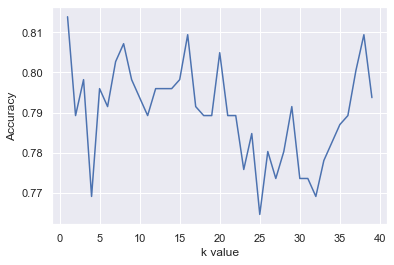

In [18]:
# K range 
k_range = range(1, 40)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(X_train_3_unbalanced, y_train_3_unbalanced)
    y_test_pred_2 = m.predict(X_test_3_unbalanced)
    accuracy.append(metrics.accuracy_score(y_test_3_unbalanced, y_test_pred_2))
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')

Tal y como se aprecia en la imagen, para el balanceado, el mejor valor de K se obtiene con K = 1. Por tanto se prueba con ese valor:

In [19]:
# KNN

## KNN with clean text

KNN_JC_opt = KNeighborsClassifier(n_neighbors=1)

### Balanced
KNN_JC_opt.fit(X_train_3, y_train_3)
KNN_JC_opt_pred = KNN_JC_opt.predict(X_test_3)
KNN_JC_opt_acc = accuracy_score(KNN_JC_opt_pred, y_test_3)
print('KNN accuracy opt with stemmed text column and balanced is: ' + str(KNN_JC_opt_acc))

### Unalanced
KNN_JC_opt.fit(X_train_3_unbalanced, y_train_3_unbalanced)
KNN_JC_opt_pred = KNN_JC_opt.predict(X_test_3_unbalanced)
KNN_JC_opt_acc = accuracy_score(KNN_JC_opt_pred, y_test_3_unbalanced)
print('KNN accuracy opt with stemmed text column and unbalanced is: ' + str(KNN_JC_opt_acc))

KNN accuracy opt with stemmed text column and balanced is: 0.8581081081081081
KNN accuracy opt with stemmed text column and unbalanced is: 0.8139013452914798


Como se ve, KNN optimizado sigue la tónica general que ya se ha visto. El balanceo del dataset es tremendamente importante (en el caso optimizado se obtiene una mejora de casi 0,5 en accuracy), mientras que el preprocesamiento no parece de nuevo del todo necesario, ya que se obtienen accuracies muy parecidas. Este clasificador puede ser útil para casos con textos en bruto

#### KNN with TF-IDF

In [39]:
# Apply KNN tfidf
KNN_JC_tfidf = KNeighborsClassifier(n_neighbors=1)

KNN_JC_tfidf.fit(X_tfidf_train, y_tfidf_train)
KNN_JC_tfidf_pred = KNN_JC_tfidf.predict(X_tfidf_test)
KNN_JC_tfidf_acc = accuracy_score(KNN_JC_tfidf_pred, y_tfidf_test)
print('KNN accuracy with stem column, optimization on K and balanced is: ' + str(KNN_JC_tfidf_acc))

# Confusion matrix
print(metrics.confusion_matrix(y_tfidf_test, KNN_JC_tfidf_pred))

# Report
print(classification_report(y_tfidf_test, KNN_JC_tfidf_pred))


KNN accuracy with stem column, optimization on K and balanced is: 0.8597972972972973
[[292   4]
 [ 79 217]]
              precision    recall  f1-score   support

          -1       0.79      0.99      0.88       296
           1       0.98      0.73      0.84       296

    accuracy                           0.86       592
   macro avg       0.88      0.86      0.86       592
weighted avg       0.88      0.86      0.86       592



También se ha aplicado TFIDFVectorizer para KNN con un resultado no tan negativo como en Perceptron, pero tampoco excesivamente positivo dado que tampoco mejora considerablemente a Count Vectorizer, quedándose igual.

#  Conclusiones dataset 5G + COVID

* Al igual que la primera conclusión del dataset de las emociones, la limpieza del texto no tiene una implicación muy alta en los resultados obtenidos.
* Por otro lado el uso de SMOTE si ha resultado muy satisfactorio, dado que se notan mejorías hasta 0,5 en los algoritmos probados en comparación con el dataset no balanceado.
* En cuanto a los algoritmos probados:
    - KNN ha tenido buenos resultados, sobre todo útil cuando no se dispone de texto preprocesado y se pretende introducir texto en bruto.
    - Los perceptrones han obtenido muy buenos resultados (cercanos a 0,9) pero el que mejor resultado obtiene, MLP, tarda un poco en llegar a dicho resultado y además funcionan claramente mejor con los textos en bruto.
    - Logistic Regression sí obtiene resultados muy buenos y rápidos, con un valor de más de 0,91, siendo el mejor clasificador obtenido para 5G como para emociones.